## Question 1a

Complete the function load_data below to load three datasets that we will use in subsequent questions. Be sure to follow the instructions below for each dataset respectively.

Energy

Load the energy data from the file assets/Energy Indicators.xls, which is a list of indicators of energy supply and renewable electricity production from the United Nations for the year 2013, and should be put into a DataFrame with the variable name of energy.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable]

Convert Energy Supply to gigajoules (Note: there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as np.NaN values.

Rename the following list of countries (for use in later questions):

"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"

There are also several countries with parenthesis in their name. Be sure to remove these, e.g. 'Bolivia (Plurinational State of)' should be 'Bolivia'.

GDP

Next, load the GDP data from the file assets/world_bank.csv, which is a csv containing countries' GDP from 1960 to 2015 from World Bank. Call this DataFrame gdp.

Make sure to skip the header, and rename the following list of countries:

"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"

ScimEn

Finally, load the Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology from the file assets/scimagojr-3.xlsx, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame scim_en.

For all three datasets, use country names as the index.

In [ ]:
def load_data():
    # Competency: reading files in Pandas, df manipulation, regex
    
    # The three variables are initialized to None. You will fill them with the correct values. 
    #energy, gdp, scim_en = [None] * 3
    
    # YOUR CODE HERE
    #raise NotImplementedError()
    energy= pd.read_excel('assets/Energy Indicators.xls', usecols=[2,3,4,5], skiprows=17,skipfooter=38, na_values='...')
    energy = energy.rename(columns={'Unnamed: 2': 'Country', 'Petajoules':'Energy Supply', 'Gigajoules':'Energy Supply per Capita', '%':'% Renewable'})
    energy['Energy Supply']= energy['Energy Supply'].apply(lambda x: x*1000000)
    energy['Country']= energy.Country.str.replace('\(.*\)',"", regex=True)
    energy['Country']= energy.Country.str.replace('[0-9]+?$',"",regex=True)
    energy['Country']= energy.Country.str.replace('^[ \s]+|[ \s]+$',"", regex=True)
    energy['Country']=energy['Country'].replace({'Republic of Korea': 'South Korea','United States of America':'United States',
                           'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
                           'China, Hong Kong Special Administrative Region':'Hong Kong'})
    energy= energy.set_index('Country')
    ##print(energy.head(35))


    gdp= pd.read_csv('assets/world_bank.csv',skiprows=4)
    gdp= gdp.replace({'Korea, Rep.':'South Korea','Iran, Islamic Rep.':'Iran','Hong Kong SAR, China':'Hong Kong'},regex=True)
    gdp= gdp.rename(columns={'Country Name':'Country'})
    gdp= gdp.set_index('Country')
    #print(gdp.head())
    
    scim_en= pd.read_excel('assets/scimagojr-3.xlsx')
    scim_en= scim_en.set_index('Country')
    #print(scim_en.head())
    return energy, gdp, scim_en

load_data()

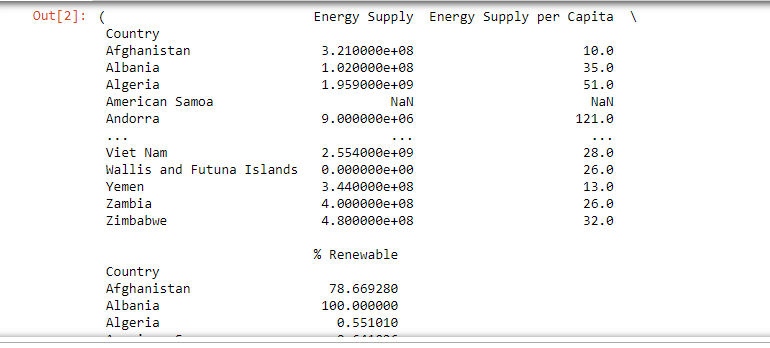

## Merging dataframes

Below is code on how I merged all three dataframes and sorted the new dataframe by rank. Following this is a picture of the first 10 results of the resulting dataframe.

## Question 1c

Join the three datasets to form a new dataset, using the intersection of country names. Keep only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15).

The index of the resultant DataFrame should still be the name of the country, and the columns should be

['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
    'Citations per document', 'H index', 'Energy Supply',
    'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
    '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

This function should return a DataFrame with 20 columns and 15 entries.

In [ ]:
merge_1= pd.merge(energy, scim_en, on='Country') 
    df= pd.merge(merge_1, gdp, on='Country')
    columns = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
    'Citations per document', 'H index', 'Energy Supply',
    'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
    '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    df=df[columns]
    df= df[df['Rank']<=15]
    df= df.sort_values('Rank')

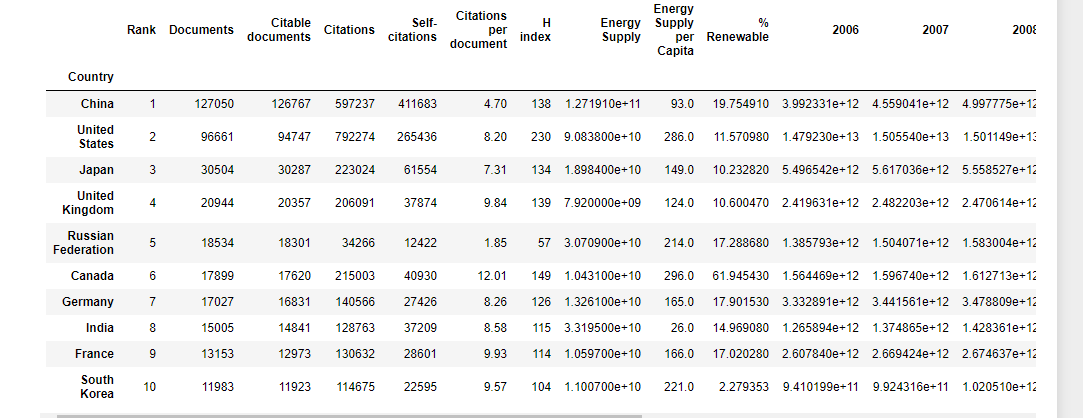